In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.10.0'

## Dataset 준비
* 학습을 위해 제공되는 MNIST dataset을 준비

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

In [3]:
train_data[10].shape

(28, 28)

In [4]:
train_labels[11]

5

In [5]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
set(train_labels[:100])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
# 데이터 전처리 파트 -> 도메인 지식이 들어가게 됩니다.
train_data = train_data / 255.
train_data = train_data.reshape(-1, 28 * 28)
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [8]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### Dataset 구성
* 원활한 학습을 위해서 데이터셋을 구성해주고, Label을 one-hot으로 변환해준다.

In [9]:
def one_hot_label(image, label):
  label = tf.one_hot(label, depth=10)
  return image, label

In [10]:
batch_size = 64
max_epochs = 10

# for train
N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)) # 한장씩 가져오라고 세팅 이터어블로 만듬
train_dataset = train_dataset.shuffle(buffer_size=10000) #  섞음
train_dataset = train_dataset.map(one_hot_label) # 레이블 원핫을 기본
train_dataset = train_dataset.repeat().batch(batch_size=batch_size) # 한번에 몇개씩 불러올지 세팅
print(train_dataset)


# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)

Metal device set to: Apple M1
<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


2023-12-26 10:27:35.581530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-26 10:27:35.581882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
for train, label in train_dataset.take(3):
    print(label)
print("--------")
for train, label in train_dataset.take(3):
    print(label)

tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

2023-12-26 10:27:36.075627: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [12]:
# for train, label in test_dataset.take(3):
#     print(label)
# print("--------")
# for train, label in test_dataset.take(3):
#     print(label)

* 데이터 확인

label = 4


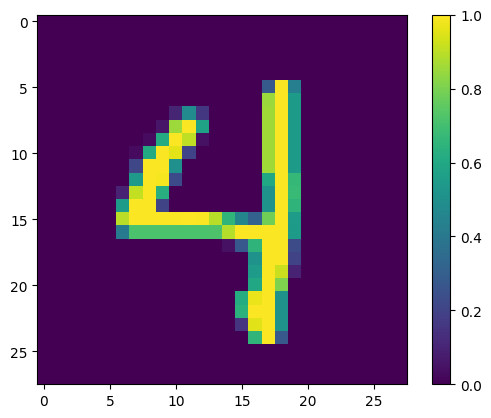

In [13]:
index = 2190
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

# 모델 제작
## tf.keras.layers.Dense

```python
 def __init__(self,
               units,  # 필수 유닛갯수
               activation=None, # 필수
               use_bias=True, 
               kernel_initializer='glorot_uniform', # 학습이 잘 안될때  튜닝용
               bias_initializer='zeros',
               kernel_regularizer=None,
               bias_regularizer=None,
               activity_regularizer=None,
               kernel_constraint=None,
               bias_constraint=None,
               **kwargs):


```

# 모델제작방법

1. Sequential
2. Functional API
3. Subclass

In [14]:
# layers.Dense(64,
#              activation='relu',
#              kernel_initializer=tf.keras.initializers.HeNormal(),
#              kernel_regularizer=tf.keras.regularizers.L2(0.0001)
#              ) t

In [15]:
# Flatten (inputs)
# Dense 50
# Dense 10 (outputs)
model = tf.keras.models.Sequential()
model.add(layers.Dense(64, activation='relu')) # 유닛갯수, activation
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))


In [16]:
#동일 
model = tf.keras.models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),# Units: 64, Activation: 'relu'
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),# Units: 32, Activation: 'relu'
    layers.Dense(10, activation='categorical' ) 
])


ValueError: Unknown activation function: categorical. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# model = keras.Sequential([
#     # 이 부분은 수정하지 않도록 합시다.
#     keras.layers.Reshape(input_shape=(28, 28), target_shape=(28, 28, 1)),
# 
#     # 다음은 첫번째 레이어의 예제입니다. 여러분이 수정해야 할 것은 이 레이어부터입니다.
#     keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
# 
#     # ... 중간에 여러개의 다른 레이어를 추가해 봅시다.
#     # ...
# 
#     # 이 부분은 수정하지 않도록 합시다.
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation=None)
# ])


# Training
## tf.keras.losses.CategoricalCrossentropy()

```python
cce = tf.keras.losses.CategoricalCrossentropy()
loss = cce([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]],
           [[.9, .05, .05], [.5, .89, .6], [.05, .01, .94]])
print('Loss: ', loss.numpy())  # Loss: 0.3239
```

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              #모델 아웃풋이 logiist인 상태 자체적으로 로짓과 액티베이션을 분리해서 다양한 액티베이션으로 분석함
              
              metrics=['accuracy'])

# sparseCategoricalCrossentropy - int를 알아서 원핫으로

### 모델 확인

In [ ]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

### 학습진행
* model.fit 함수가 최근에 model.fit_generator 함수와 통합
* Dataset을 이용한 학습을 진행

In [ ]:
# using `numpy type` data
# history = model.fit(train_data, train_labels,
#                     batch_size=batch_size, epochs=max_epochs,
#                     validation_split=0.05)
# using `tf.data.Dataset` # model.fit_generator
#위의 것은 메모리 관리가 안됨.

history = model.fit(train_dataset, epochs=max_epochs,
                   steps_per_epoch=len(train_data) // batch_size)
#steps_per_epoch =1 에폭에 대한 정보를 fit에 알려줌

## 데이터로더의 단점 1. batch가 짤리는 것을 입력받지 못함.repeat()로 처리
## 2. 

### 학습결과 확인

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(max_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training and Loss')
plt.show()

In [ ]:
results = model.evaluate(test_dataset, steps=int(len(test_data) / batch_size))

In [ ]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

In [ ]:
np.random.seed(219)
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(28, 28))
  p.axis('off')